In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv

--2018-09-21 07:16:22--  https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14870 (15K) [text/plain]
Saving to: ‘Cars93.csv’

Cars93.csv          100%[===================>]  14,52K  --.-KB/s    in 0,06s   

2018-09-21 07:16:22 (227 KB/s) - ‘Cars93.csv’ saved [14870/14870]



In [3]:
data = pd.read_csv('Cars93.csv')
subset = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]


In [4]:
import sklearn.linear_model
import sklearn.model_selection

In [8]:
X = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

In [9]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

In [16]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][1]
beta3 = linear.coef_[0][2]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2, beta3)
print('R2 (train vs. validation)', r2_train, r2_validation)



betas: 9.65013643588024 0.10513237581368523 0.07090960892695627 -0.29522882677076445
R2 (train vs. validation) 0.7195649254864139 0.5054064609707412


In [17]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][1]
    beta3 = linear.coef_[0][2]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2, beta3)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)

ITERACION  0
	 betas: 2.3680607367197233 0.11425084175445095 0.1308573494726253 -0.15756265696432323
	 R2 (train vs. validation) 0.6232459991732939 0.6063057032403764
ITERACION  1
	 betas: 44.67474531490127 0.13483012752468634 -0.7575355911709131 -0.4988355153225171
	 R2 (train vs. validation) 0.5799196188975306 0.6916654438958564
ITERACION  2
	 betas: 18.81783407714888 0.12415851201760127 -0.2456193787147866 -0.2906828620845161
	 R2 (train vs. validation) 0.7204434032663117 0.5547912393420764
ITERACION  3
	 betas: 28.668137362837214 0.16502848373956525 -0.5380784303701664 -0.3546720932092522
	 R2 (train vs. validation) 0.6985428115658219 0.3487971963726355
ITERACION  4
	 betas: 17.281639950103305 0.10328391992035486 -0.08139464142721507 -0.3554863785206027
	 R2 (train vs. validation) 0.6751383687332824 0.5492111123264565
ITERACION  5
	 betas: 42.419441914153026 0.17420699887034224 -0.9444624456863766 -0.33409332281037907
	 R2 (train vs. validation) 0.703877194157138 0.2656747092776537

In [18]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

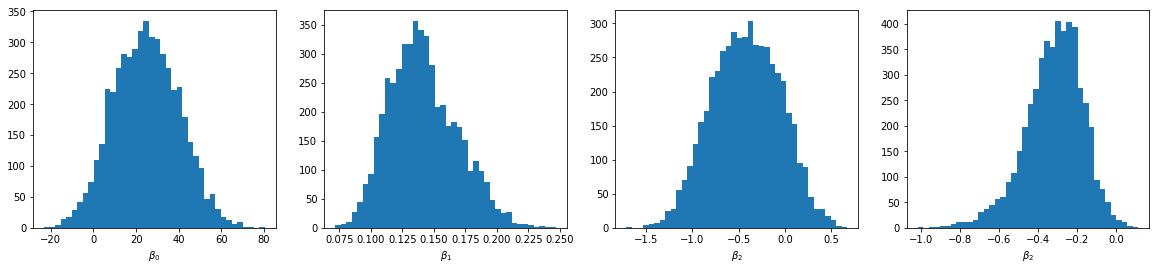

In [22]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_2$')


In [27]:
print('beta 0 {} +/- {}'.format(beta_0.mean(),1.5* beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), 1.5*beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), 1.5*beta_2.std() ))
print('beta 3 {} +/- {}'.format(beta_3.mean(), 1.5*beta_3.std() ))
print('Observando que las colas no son especialmente largas, se toma 1.5 desviacies estándar. Por lo que el único beta compatible con cero soes beta 3')

beta 0 24.771678301328148 +/- 22.887709668991324
beta 1 0.14155588729467677 +/- 0.04048477131456985
beta 2 -0.41824532816149257 +/- 0.5539663644722024
beta 3 -0.3207506471295958 +/- 0.22284533623779526
Observando que las colas no son especialmente largas, se toma 1.5 desviacies estándar. Por lo que el único beta compatible con cero soes beta 3


In [28]:
def model(x,params):
    n = len(params)
    rta = 0
    for j in range(n):
        rta += params[j] * x[j]
    return rta


def loglikelihood(x_obs, y_obs, s_ob, params):
    y_model = poly(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/s_ob)**2
    return np.sum(d)


def logprior(params):
    if( (params > 1.0).any() and (params < -1.0).any() ):
        return -np.inf;
    return 0.0

def SME(x_obs,y_obs, sigma, params):
    d = (y_obs - poly(x_obs,params))/sigma
    return (1.0/len(params)* (np.sum(d**2)))

def best(listaParams):
    rta = np.zeros_like(listaParams[:,0])
    for k in range(len(rta)):
        rta[k] = np.mean(listaParams[k,:])
    return rta
    
def entrenar(grado=5,N = 10000):
    n = grado +1
    propuestas = np.zeros(n)
    listas = np.zeros((n, N))
    logposterior = np.zeros(N)
    listas[:,0] = np.random.random(len(listas[:,0]))
    for i in range(1,N):
        propuestas  = listas[:,i-1] + np.random.normal(loc=0.0, scale=0.3, size = n)
        #print(propuestas.shape)
        logposterior_viejo = loglikelihood(xtrain, ytrain, strain, listas[:,i-1]) + logprior(listas[:,i-1])
        logposterior_nuevo = loglikelihood(xtrain, ytrain, strain, propuestas) + logprior(propuestas)
#        print(logposterior_nuevo, logposterior_viejo)
#        print(propuestas)
        r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
        alpha = np.random.random()
        if(alpha<r):
            listas[:, i] = propuestas
#        print(listas[:,i] - propuestas)
            logposterior[i] = logposterior_nuevo
        else:
            listas[:, i] = listas[:,i-1]
#        print(listas[:,i] - listas[:,i-1])
            logposterior[i] = logposterior_viejo
#    print(listas)
    return listas

In [74]:
k = ['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
X=data[k]

In [87]:
n_boot = 5000
n_beta = len(k)+1
beta = np.ones((n_boot,n_beta))

r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta[i][0] = linear.intercept_[0]
    for j in range(1,n_beta):
        beta[i][j] = linear.coef_[0][j-1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

In [93]:
sigmas = 1.5
for j in range(n_beta):
    print('beta{:d} {} +/- {}'.format(j,beta[:,j].mean(), sigmas*beta[:,j].std() ))
    
nuevoK = []
print('Las variables que NO son consistentes con cero')
for j in range(1,n_beta):
    if(beta[:,j].mean() - sigmas*beta[:,j].std() < 0 and beta[:,j].mean() +sigmas*beta[:,j].std() >0):
        print(k[j-1])
        nuevoK += [k[j-1]]

beta0 11.955911939558797 +/- 28.561884826477144
beta1 -0.0540802589307643 +/- 0.35372269544175305
beta2 0.5675314846692872 +/- 1.1410446712378306
beta3 0.03482371324621424 +/- 0.18485530740449388
beta4 -0.385167729056172 +/- 0.5005433812516519
beta5 0.010842975521949348 +/- 0.00715341798190872
Las variables que NO son consistentes con cero
MPG.highway
EngineSize
Horsepower
Rev.per.mile


In [94]:
X=data[nuevoK]

In [95]:
n_boot = 5000
n_beta = len(nuevoK)+1
beta = np.ones((n_boot,n_beta))

r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta[i][0] = linear.intercept_[0]
    for j in range(1,n_beta):
        beta[i][j] = linear.coef_[0][j-1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

In [96]:
sigmas = 1.5
print('El modelo que queda es')
for j in range(n_beta):
    print('beta{:d} {} +/- {}'.format(j,beta[:,j].mean(), sigmas*beta[:,j].std() ))
    


El modelo que queda es
beta0 -6.105086874416656 +/- 10.575431688159693
beta1 -0.27589120368621944 +/- 0.16850161984366543
beta2 1.5344063576454852 +/- 2.1488063783869102
beta3 0.1334327422748168 +/- 0.0492169710195588
beta4 0.004458136495909627 +/- 0.002696310300000957


['MPG.highway', 'Fuel.tank.capacity', 'Length', 'Wheelbase', 'Weight']